### 機械学習とは
---
説明変数を用いてモデルを作り、目的変数を予測する

** ポイント **

* どの説明変数を用いて予測するのか?が重要である

#### 学習とテスト
---
* 学習(Training)
  - 説明変数を使って、目的変数をうまく予測できるモデルを作る
* テスト(Test)
  - 説明変数だけを使って、目的変数を予測する
* 分類(Classfication)
  - 目的変数が離散的(男性なのか、女性なのかを判断する)
* 回帰(Regression)
  - 目的変数が連続的な数値(170cmなのか)
  
#### 学習の種類
---
* 教師あり学習(Supervised learnig)
  - 目的変数を学習に利用してモデルを作る（モデルを作る前に答えがある）
* 教師なし学習(Unsupervised learnig)
  - 説明変数だけを使って、サンプルの分類などをする

### 線形回帰(教師あり学習)
---
** 進め方 **
1. データの準備
2. ひとまず可視化
3. 最小二乗法の数学的な背景
4. Numpyを使った単回帰
5. 誤差について
6. scikit-learnを使った重回帰分析
7. 学習(Training)と検証(Validation)
8. 価格の予測
9. 残差プロット

### 1.データの準備
---

In [2]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# scikit-learnのデータセットから任意のデータをインポートする
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

#### データ内容の和訳
---
* numeric : 数値
* categorical predictive : カテゴリ変数
* Median Value : 中央値(代表値のひとつで、有限個のデータの中の中央に位置するもの)

In [6]:
# .DESCRでデータ内容の説明を見ることができる

print(boston. DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 2.データの可視化
---
まずはデータの全体像を理解するために"ヒストグラム"を表示させよう

#### ヒストグラム(histogram)

Text(0,0.5,'Number of houses')

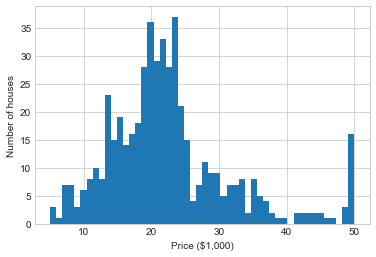

In [11]:
plt.hist(boston.target, bins=50)
# ラベルの表示
plt.xlabel('Price ($1,000)')
plt.ylabel('Number of houses')

#### 分析
---
1ドル100円とすると、10万ドルは1,000万円なので、
**2,000万円強の価格帯がボリュームゾーンである**ことがわかる

#### 散布図(Scatter plot)

Text(0.5,0,'Number of houses')

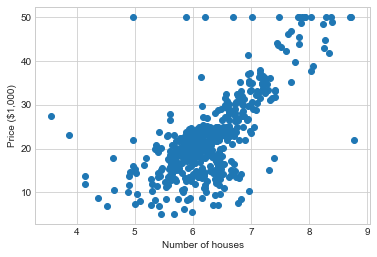

In [13]:
# 　x軸は部屋の数とする　= RM       average number of rooms per dwellingは５列目にあるので[:,5]
#  y軸は価格
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('Price ($1,000)')
plt.xlabel('Number of rooms')

#### 分析
---
部屋数が増えれば、価格も上昇している

In [14]:
# DataFrameに変更する
boston_df = DataFrame(boston.data)
# 列名を入れる
boston_df.columns = boston.feature_names

In [15]:
# データの一部を確認する
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
